# Credit Card Fraud Detection

## Data Preparation

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Separate the featues and the label.

In [3]:
y = df['Class']
X = df.drop('Class', axis=1)

## Data Wrangling

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

It seems that *Time* would not have any relationship with our later predictions. So drop it.

In [5]:
X.drop('Time', axis=1, inplace=True)

In [6]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Log-Scale *Amount* Column

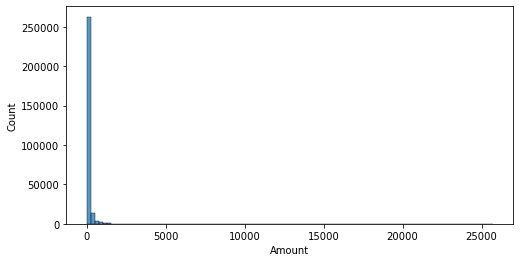

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(X['Amount'], bins=100)
plt.show()

The data distribution is greatly skewed, so let's use the log-scaled version for *Amount* column.

In [8]:
import numpy as np

X['Amount'] = np.log1p(X['Amount'])

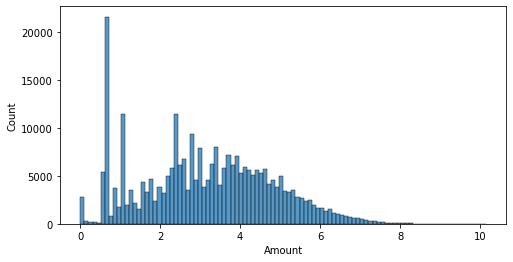

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(X['Amount'], bins=100)
plt.show()

### Remove the Outliers from *Amount* Column

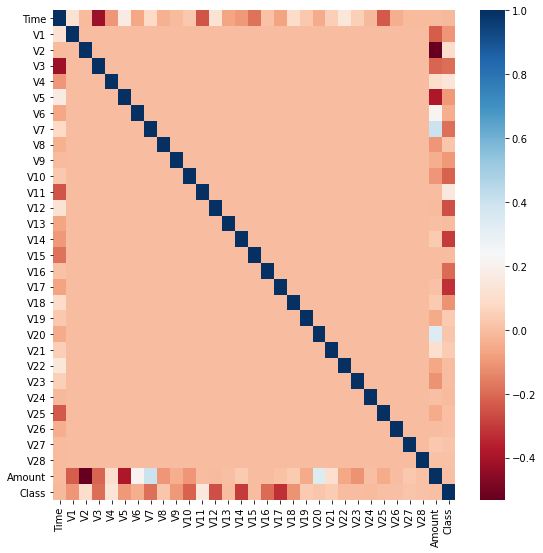

In [10]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap='RdBu')
plt.show()

*V14* and *V17* seems to have a strong correlation with *Class*. Let's remove the outliers from *V14* column.

In [11]:
import numpy as np

quantile_25 = np.percentile(X['V14'].values, 25)
quantile_75 = np.percentile(X['V14'].values, 75)
iqr = quantile_75 - quantile_25
threshold_low = quantile_25 - 1.5 * iqr
threshold_high = quantile_75 + 1.5 * iqr
outlier_indices = X['V14'][(X['V14'] < threshold_low) | (X['V14'] > threshold_high)].index
X.drop(outlier_indices, axis=0, inplace=True)
y.drop(outlier_indices, axis=0, inplace=True)

### Train/Test Split

Split the dataset into train and test parts.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Apply SMOTE Oversampling

In [13]:
print(y_train.value_counts())

0    189417
1        43
Name: Class, dtype: int64


The dataset is greatly imbalanced, so we need to over-sample the data with class 1.

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

In [15]:
print(y_train.value_counts())

0    189417
1    189417
Name: Class, dtype: int64


## Train Model

We are going to use LightGBM classifier.

In [16]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(n_estimators=1000, num_leaves=64, boost_from_average=False)
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)

## Test Model

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

predictions = lgbm_classifier.predict(X_test)
predictions_probability = lgbm_classifier.predict_proba(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions_probability[:, 1])
print(f'Accuracy on the test dataset: {accuracy:.4f}')
print(f'Precision on the test dataset: {precision:.4f}')
print(f'Recall on the test dataset: {recall:.4f}')
print(f'F1 on the test dataset: {f1:.4f}')
print(f'ROC AUC on the test dataset: {roc_auc:.4f}')

Accuracy on the test dataset: 0.9997
Precision on the test dataset: 0.2500
Recall on the test dataset: 0.0526
F1 on the test dataset: 0.0870
ROC AUC on the test dataset: 0.7973
